# Análise exploratória

## imports de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## 1 - Vizualização da qualidade e comportamento geral do data set

### 1.1 - Carregamento dos dados do kaggle 

In [2]:
# 1. Carregar os dados de TREINO 
df_train = pd.read_csv('../data/train.csv')

# 2. Carregar os dados de TESTE
df_test = pd.read_csv('../data/test.csv')

print(df_train.head(5))

print(df_test.head(5))

       id      Time        V1        V2        V3        V4        V5  \
0  265519  161919.0  1.946747 -0.752526 -1.355130 -0.661630  1.502822   
1  180306  124477.0  2.035149 -0.048880 -3.058693  0.247945  2.943487   
2   42665   41191.0 -0.991920  0.603193  0.711976 -0.992425 -0.825838   
3  198724  132624.0  2.285718 -1.500239 -0.747565 -1.668119 -1.394143   
4   82326   59359.0 -0.448747 -1.011440  0.115903 -3.454854  0.715771   

         V6        V7        V8  ...       V21       V22       V23       V24  \
0  4.024933 -1.479661  1.139880  ...  0.076197  0.297537  0.307915  0.690980   
1  3.298697 -0.002192  0.674782  ...  0.038628  0.228197  0.035542  0.707090   
2  1.956261 -2.212603 -5.037523  ... -2.798352  0.109526 -0.436530 -0.932803   
3 -0.350339 -1.427984  0.010010  ... -0.139670  0.077013  0.208310 -0.538236   
4 -0.147490  0.504347 -0.113817  ... -0.243245 -0.173298 -0.006692 -1.362383   

        V25       V26       V27       V28  Amount  Class  
0 -0.350316 -0.388907

### 1.2 - Vizualização inicial do data set

Aqui pegamos o começo e o fim do data set para confirmar que os dados foram carregados corretamente, além de ter uma noção da estrutura geral.

In [3]:
df_train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,265519,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,180306,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,42665,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,198724,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,82326,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [4]:
df_train.tail()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227840,233803,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,...,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99,0
227841,85419,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,...,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99,0
227842,29063,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,...,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42,0
227843,13767,24413.0,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,...,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89,0
227844,17678,28847.0,-0.598120,0.775041,1.823394,0.312991,-0.096171,-0.391452,0.499351,0.071224,...,0.060615,0.568083,-0.084001,0.685003,-0.245859,0.356638,0.378580,0.206366,6.99,0


### 1.3 - Vizualização dos atributos do data set

**Nesta etapa, utilizamos o df.info() para realizar um reconhecimento da estrutura de dados. Observamos que o dataset é composto inteiramente por variáveis numéricas, o que é ideal para modelos de Machine Learning. As colunas de V1 a V28 são componentes principais resultantes de uma transformação PCA, uma técnica utilizada para garantir a confidencialidade das informações sensíveis dos clientes, mantendo apenas o sinal matemático necessário para a detecção de padrões.**

In [5]:
df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      227845 non-null  int64  
 1   Time    227845 non-null  float64
 2   V1      227845 non-null  float64
 3   V2      227845 non-null  float64
 4   V3      227845 non-null  float64
 5   V4      227845 non-null  float64
 6   V5      227845 non-null  float64
 7   V6      227845 non-null  float64
 8   V7      227845 non-null  float64
 9   V8      227845 non-null  float64
 10  V9      227845 non-null  float64
 11  V10     227845 non-null  float64
 12  V11     227845 non-null  float64
 13  V12     227845 non-null  float64
 14  V13     227845 non-null  float64
 15  V14     227845 non-null  float64
 16  V15     227845 non-null  float64
 17  V16     227845 non-null  float64
 18  V17     227845 non-null  float64
 19  V18     227845 non-null  float64
 20  V19     227845 non-null  float64
 21  V20     227845 non-nu

### 1.4 - Verificação de valores nulos

**Realizei a verificação de valores ausentes no conjunto de dados utilizando o método isnull().sum(). O objetivo foi identificar possíveis lacunas que pudessem comprometer a integridade da análise estatística ou o treinamento do modelo. Após a execução, confirmei que o dataset não apresenta nenhum valor NaN (nulo), o que atesta a excelente qualidade e limpeza da base de dados original.**

In [6]:
soma_nulos = df_train.isnull().sum()

null_summary = pd.DataFrame({
    'Coluna': soma_nulos.index,
    'Qtd_Nulos': soma_nulos.values,
    'Pct_Nulos': (soma_nulos / len(df_train) * 100).round(2).values
})

print("Resumo de Valores Nulos:")
print(null_summary.to_string(index=False))
print(f"\nTotal de valores nulos: {soma_nulos.sum()}")

Resumo de Valores Nulos:
Coluna  Qtd_Nulos  Pct_Nulos
    id          0        0.0
  Time          0        0.0
    V1          0        0.0
    V2          0        0.0
    V3          0        0.0
    V4          0        0.0
    V5          0        0.0
    V6          0        0.0
    V7          0        0.0
    V8          0        0.0
    V9          0        0.0
   V10          0        0.0
   V11          0        0.0
   V12          0        0.0
   V13          0        0.0
   V14          0        0.0
   V15          0        0.0
   V16          0        0.0
   V17          0        0.0
   V18          0        0.0
   V19          0        0.0
   V20          0        0.0
   V21          0        0.0
   V22          0        0.0
   V23          0        0.0
   V24          0        0.0
   V25          0        0.0
   V26          0        0.0
   V27          0        0.0
   V28          0        0.0
Amount          0        0.0
 Class          0        0.0

Total de valores 

**Após verificar que o conjunto de dados está completo e sem valores nulos (NaN), focamos na análise de transações com valor zero em Amount. É perfeitamente normal encontrar valores zerados nesse tipo de base, pois podem indicar tentativas de validação de contas. Entretanto, nossa investigação revelou que as fraudes estão super-representadas nesse cenário: 1,49% dessas operações zeradas são criminosas. Esse padrão indica que o fraudador frequentemente testa a validade de um cartão com uma transação de valor zero antes de realizar ataques maiores, tornando essa uma característica preditiva valiosa para o algoritmo.**

In [ ]:
zeros_mask = (df_train == 0)

soma_zeros = zeros_mask.sum()

zero_summary = pd.DataFrame({
    'Coluna': soma_zeros.index,
    'Qtd_Zeros': soma_zeros.values,
    'Pct_Zeros': (soma_zeros / len(df_train) * 100).round(2).values
})

# Mostra apenas colunas que têm pelo menos um zero tirando a coluna Class
zero_summary = zero_summary[zero_summary['Qtd_Zeros'] > 0].sort_values('Qtd_Zeros', ascending=False)
zero_summary = zero_summary[zero_summary['Coluna'] != 'Class']

print("Resumo de Valores Zero (Suspeitos):")
print(zero_summary.to_string(index=False))
print(f"\nTotal de valores zero encontrados: {zero_summary['Qtd_Zeros'].sum()}")

Resumo de Valores Zero (Suspeitos):
Coluna  Qtd_Zeros  Pct_Zeros
Amount       1476       0.65
  Time          2       0.00

Total de valores zero encontrados: 1478


In [8]:
# Analisando AMOUNT == 0
print("--- Análise de Amount == 0 ---")
df_amount_zero = df_train[df_train['Amount'] == 0]
print(f"Total de transações com valor 0: {len(df_amount_zero)}")

if len(df_amount_zero) > 0:
    print("Distribuição de Classe para valor 0 (Fraude vs Genuína):")
    print(df_amount_zero['Class'].value_counts())
    
    # Vamos ver se a proporção de fraude em valores 0 é diferente da média global
    pct_fraude_zero = df_amount_zero['Class'].mean() * 100
    print(f"\nPorcentagem de fraude em transações zeradas: {pct_fraude_zero:.4f}%")
else:
    print("Nenhuma transação com valor 0 encontrada.")

# Comparativo rápido com a média global de fraude
print(f"Porcentagem de fraude global no dataset: {(df_train['Class'].mean() * 100):.4f}%")

--- Análise de Amount == 0 ---
Total de transações com valor 0: 1476
Distribuição de Classe para valor 0 (Fraude vs Genuína):
Class
0    1454
1      22
Name: count, dtype: int64

Porcentagem de fraude em transações zeradas: 1.4905%
Porcentagem de fraude global no dataset: 0.1729%


### 1.5 - Verificação de duplicatas

**Realizei a verificação de duplicatas no dataset utilizando o método duplicated().sum() para garantir a exclusividade de cada transação. A análise confirmou que não existem registros repetidos na base de dados. Esse resultado é positivo, pois assegura que o modelo não será induzido ao erro por redundância de dados, permitindo que a aprendizagem ocorra sobre exemplos únicos e distintos de comportamento.**

In [9]:
duplicates = df_train.duplicated().sum()

if duplicates > 0:
    print(f"\nRED FLAG: {duplicates} linhas duplicadas encontradas")
    print("\nVisualizando primeiras duplicatas:")
    print(df_train[df_train.duplicated(keep=False)].head(10))
else:
    print("OK: Nenhuma duplicata encontrada")

OK: Nenhuma duplicata encontrada


### 1.6 - verificação de outliers **(IQR)**

**Nesta tabela, aplicamos o método IQR sobre o conjunto total de dados. É fundamental considerar que as variáveis (V1-V28) são resultantes de uma transformação PCA (Análise de Componentes Principais). Como a grande maioria das transações são legítimas, elas dominam a variância e acabam definindo os limites do que é considerado um comportamento 'padrão' nessas componentes. O resultado mostra que muitas fraudes foram classificadas como outliers justamente porque seus padrões vetoriais fogem dessa distribuição principal. Portanto, a alta concentração de outliers em variáveis como V11 e V3 não indica ruído, mas sim que o comportamento fraudulento é estatisticamente muito distinto do normal nessas dimensões do PCA.**


In [ ]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.drop(['Class', 'id', 'Time'], errors='ignore')

outlier_summary = []

for col in numeric_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mask_outliers = (df_train[col] < lower_bound) | (df_train[col] > upper_bound)
    outliers = df_train[mask_outliers]
    
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df_train)) * 100
    
    # Quantos desses outliers são realmente fraudes
    n_fraudes_nos_outliers = outliers['Class'].sum()
    pct_fraude_nos_outliers = (n_fraudes_nos_outliers / n_outliers * 100) if n_outliers > 0 else 0
    
    outlier_summary.append({
        'Variavel': col,
        'N_Outliers': n_outliers,
        'Pct_Outliers': round(pct_outliers, 2),
        'Min': df_train[col].min(),
        'Max': df_train[col].max(),
        'Qtd_Fraudes_Outliers': n_fraudes_nos_outliers,
        'Pct_Fraude_neste_grupo': round(pct_fraude_nos_outliers, 2)
    })

# Taxa global de fraude (0.17%)
taxa_global_fraude = df_train['Class'].mean() * 100 

outlier_df = pd.DataFrame(outlier_summary)

# Calcula o Lift
outlier_df['Lift'] = outlier_df['Pct_Fraude_neste_grupo'] / taxa_global_fraude

print(outlier_df.sort_values('Lift', ascending=False).to_string(index=False))

Variavel  N_Outliers  Pct_Outliers         Min          Max  Qtd_Fraudes_Outliers  Pct_Fraude_neste_grupo       Lift
     V11         611          0.27   -4.797473    12.018913                   233                   38.13 220.500758
      V3        2689          1.18  -48.325589     9.382558                   250                    9.30  53.780673
     V17        5864          2.57  -25.162799     9.253526                   314                    5.35  30.938344
     V16        6508          2.86  -14.129855    17.315112                   276                    4.24  24.519360
     V10        7558          3.32  -24.588262    23.745136                   318                    4.21  24.345874
      V7        7112          3.12  -43.557242   120.589494                   239                    3.36  19.430437
     V14       11321          4.97  -19.214325    10.526766                   344                    3.04  17.579919
     V18        6084          2.67   -9.498746     5.041069     

**Nessa visualização, diferente da tabela, temos uma visão por classe; assim podemos ver se aquele valor é ou não um outlier dentro do próprio grupo. Isso está mais visível no boxplot da V17 para a Classe 1, onde vemos que não foi marcado nenhum outlier. Isso quer dizer que, para essa categoria, os valores dentro da caixa laranja são normais. Assim, temos uma noção melhor de que, a partir de um certo limite em V17, a chance de fraude aumenta drasticamente, indicando que nessa feature as operações fraudulentas seguem um padrão mais fácil de ser identificado pelos modelos.**

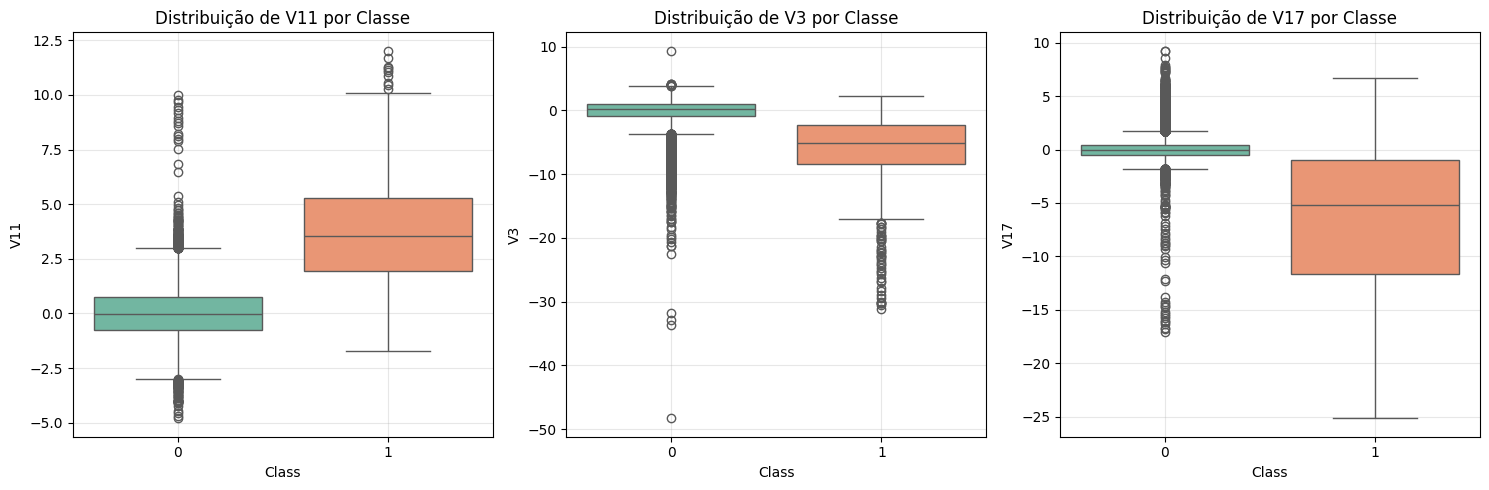

In [11]:
# As 3 melhores variáveis (maior Lift/Qtd Fraudes)
top_features = ['V11', 'V3', 'V17'] 

plt.figure(figsize=(15, 5))

for i, col in enumerate(top_features):
    plt.subplot(1, 3, i+1)
    
    # Boxplot separando Fraude (1) de Normal (0)
    sns.boxplot(x='Class', y=col, hue='Class', data=df_train, palette='Set2', legend=False)
    plt.title(f'Distribuição de {col} por Classe')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2 - Análise univariada

### 2.1 - Análise da distribuição

**O sumário estatístico abrange as variáveis numéricas, incluindo as componentes do PCA e as features originais ('Time' e 'Amount'). Isso permite verificar a centralização dos dados (média próxima de zero nas variáveis 'V') e identificar a escala distinta das demais variáveis.**

In [12]:
df_train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,142516.559508,94885.093704,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,...,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,88.176298,0.001729
std,82225.135238,47488.415034,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,...,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,250.722602,0.041548
min,1.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,71255.000000,54228.000000,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,...,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,5.640000,0.000000
50%,142583.000000,84805.000000,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,...,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,22.000000,0.000000
75%,213708.000000,139364.000000,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,...,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,77.490000,0.000000
max,284807.000000,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


### 2.2 - Análise de histogramas por KDE Plot

**A análise de histogramas com KDE Plot (Estimativa de Densidade por Kernel) foi utilizada para observar a distribuição de probabilidade de cada variável em relação às duas classes. Diferente de um histograma comum, o KDE suaviza a distribuição, permitindo identificar com clareza onde as densidades de transações legítimas e fraudulentas se sobrepõem ou se distanciam. Variáveis como V17, V14 e V12 mostram distribuições bimodais bem marcadas, onde a fraude se desloca para as caudas negativas. Essa disparidade visual é um indicativo de que essas features possuem um alto poder discriminatório, facilitando a separação das classes pelo modelo preditivo.**

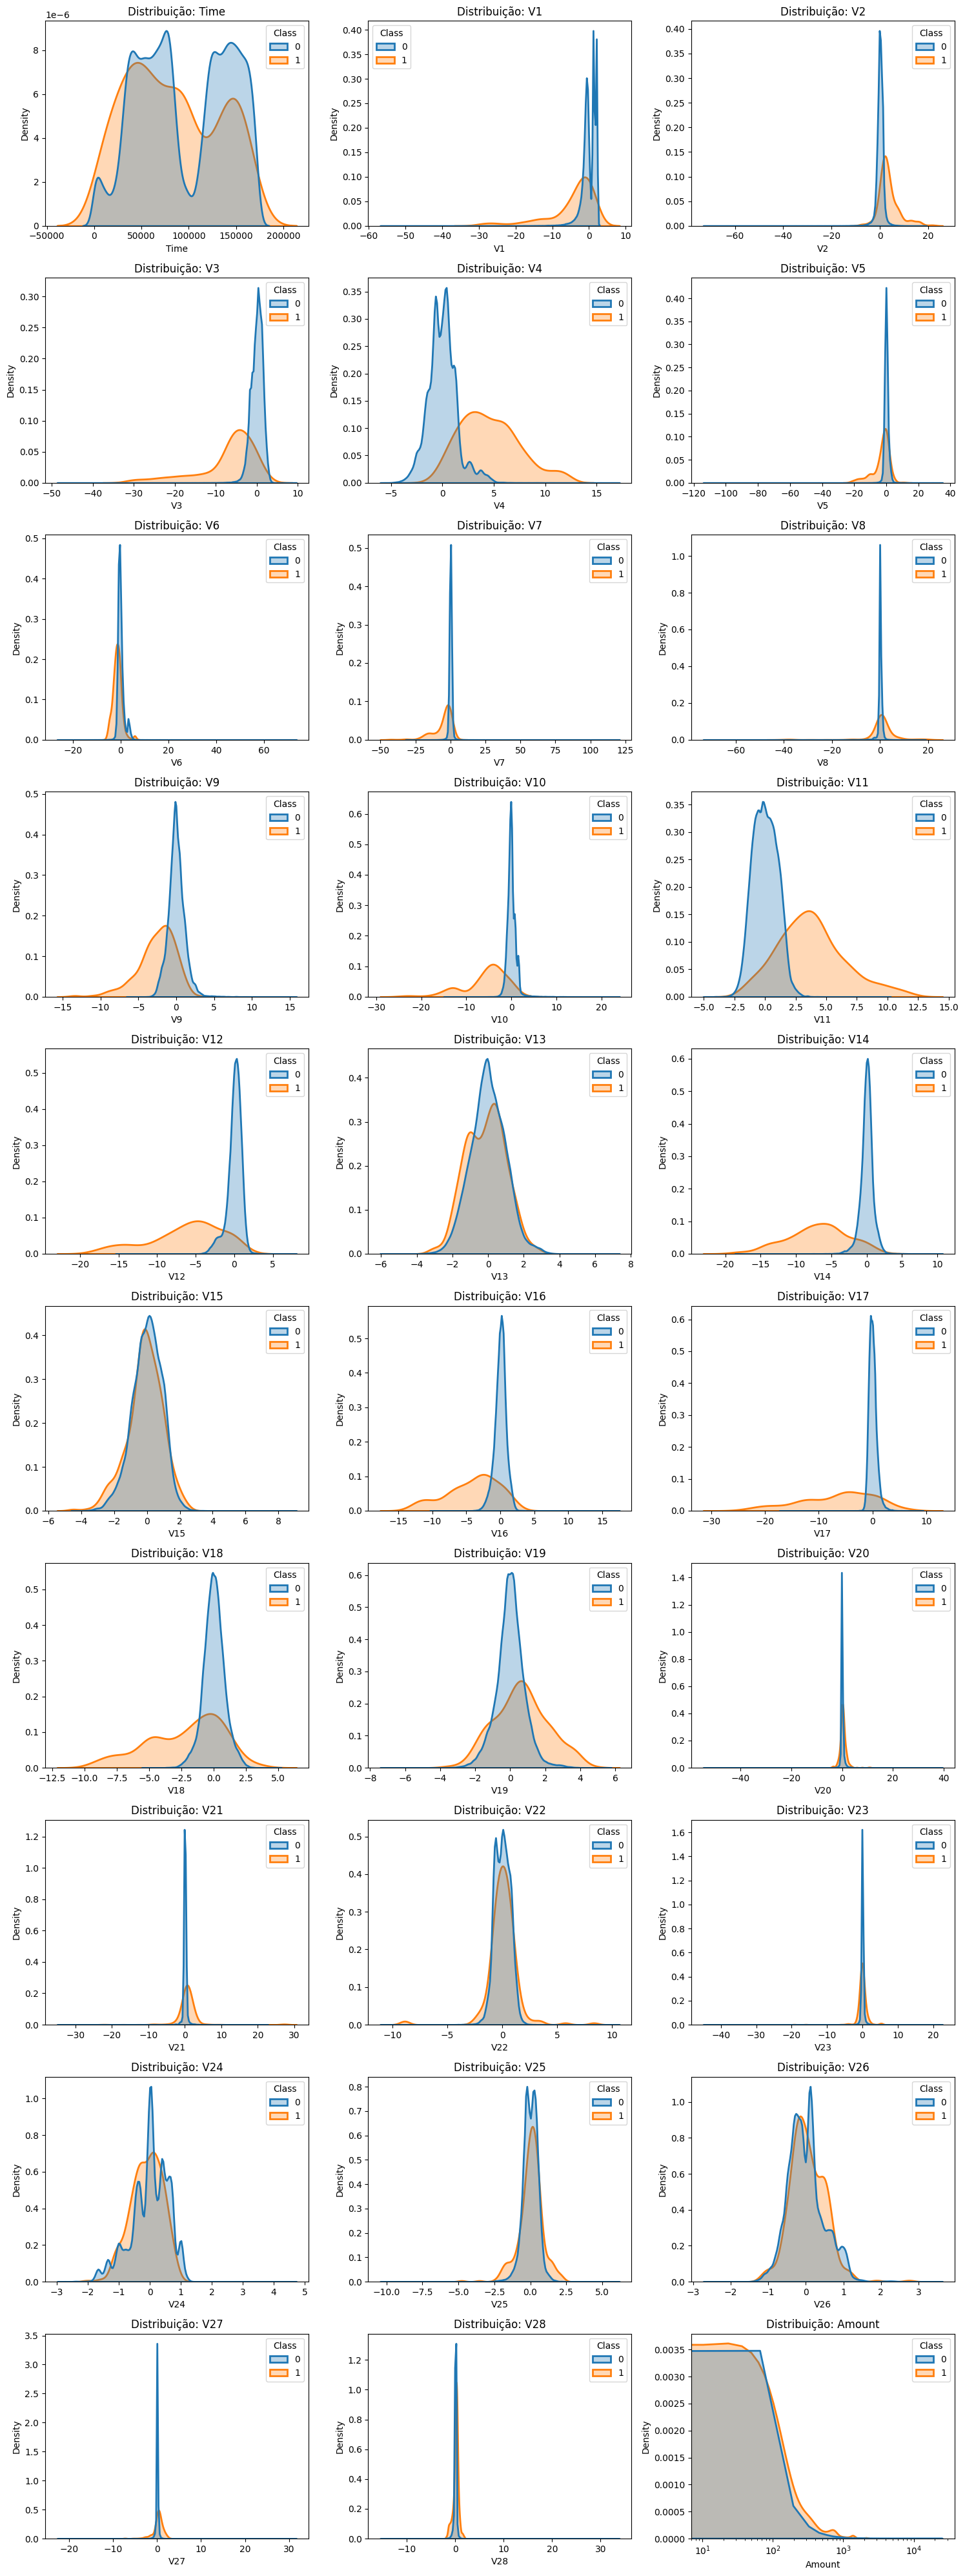

In [ ]:
# Selecionar colunas
cols_to_plot = df_train.select_dtypes(include=['number']).columns.drop(['Class', 'id'], errors='ignore') 

n_cols = len(cols_to_plot)
n_grid_cols = 3 
n_grid_rows = math.ceil(n_cols / n_grid_cols) 

fig, axes = plt.subplots(n_grid_rows, n_grid_cols, figsize=(15, 4 * n_grid_rows))
axes = axes.flatten() 

for idx, col in enumerate(cols_to_plot):
    sns.kdeplot(data=df_train, x=col, hue='Class', 
                fill=True, common_norm=False, palette=['#1f77b4', '#ff7f0e'], 
                alpha=0.3, linewidth=2, ax=axes[idx], warn_singular=False)
    
    axes[idx].set_title(f'Distribuição: {col}')
    
    if col == 'Amount':
        axes[idx].set_xscale('log')

# Remove eixos vazios
for i in range(n_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 2.3 - Análise das médias e medianas entre as classes, assimetria e curtose

**Para quantificar o que vimos nos gráficos, realizamos um resumo estatístico detalhado de cada variável. A diferença entre médias e medianas das classes revela o 'poder de separação' de cada feature; quanto maior essa distância, mais fácil é para o modelo distinguir a fraude. Além disso, incluímos a Assimetria e a Curtose para entender a geometria da fraude: enquanto a assimetria indica para qual lado a fraude 'puxa' os valores (se para o extremo positivo ou negativo), a curtose revela a presença de outliers extremos e a concentração dos ataques.**

In [ ]:
stats_summary = []

# Excluímos colunas que não são features numéricas do PCA/Amount
cols_to_ignore = ['Class', 'id', 'Time']

for col in df_train.columns:
    if col in cols_to_ignore:
        continue
        
    # Separando os grupos
    grupo_normal = df_train[df_train['Class']==0][col]
    grupo_fraude = df_train[df_train['Class']==1][col]
    
    # --- Estatísticas Classe 0 (Normal) ---
    mean_0 = grupo_normal.mean()
    median_0 = grupo_normal.median()
    
    # --- Estatísticas Classe 1 (Fraude) ---
    mean_1 = grupo_fraude.mean()
    median_1 = grupo_fraude.median()
    
    # --- Geometria da Fraude (Novas Métricas) ---
    skew_1 = grupo_fraude.skew()      # Assimetria
    kurt_1 = grupo_fraude.kurtosis()  # Curtose
    
    # --- Poder de Separação ---
    diff_means = abs(mean_0 - mean_1)
    
    stats_summary.append({
        'Feature': col,
        'Diff_Médias': round(diff_means, 2), 
        'Média_Normal': round(mean_0, 2),
        'Média_Fraude': round(mean_1, 2),
        'Mediana_Normal': round(median_0, 2),
        'Mediana_Fraude': round(median_1, 2),
        'Skew_Fraude': round(skew_1, 2),     
        'Kurt_Fraude': round(kurt_1, 2)      
    })

# Criando DataFrame e ordenando pelas features que mais separam os grupos
df_stats = pd.DataFrame(stats_summary).sort_values('Diff_Médias', ascending=False)

print(df_stats.to_string(index=False))

Feature  Diff_Médias  Média_Normal  Média_Fraude  Mediana_Normal  Mediana_Fraude  Skew_Fraude  Kurt_Fraude
 Amount        37.48         88.11        125.59           22.00            9.17         3.59        15.99
     V3         7.08          0.01         -7.07            0.18           -5.13        -1.53         1.83
    V14         6.93          0.01         -6.92            0.05           -6.70        -0.26        -0.27
    V17         6.54          0.01         -6.53           -0.06           -5.22        -0.51        -0.44
    V12         6.24          0.01         -6.22            0.14           -5.44        -0.66        -0.26
    V10         5.70          0.01         -5.69           -0.09           -4.57        -1.17         1.45
     V7         5.55          0.01         -5.54            0.04           -2.93        -1.91         4.65
     V1         4.72          0.01         -4.71            0.02           -2.27        -1.85         3.13
     V4         4.60         -0.01   

### 2.4 - Análise de desbalanceamento da variável alvo

**Para evidenciar a desproporção crítica entre transações legítimas e fraudulentas, visualizamos a distribuição absoluta e relativa da variável alvo. O desbalanceamento extremo (onde fraudes representam apenas ~0,17%) expõe o 'Paradoxo da Acurácia': um modelo que chute cegamente que todas as transações são legítimas teria 99,8% de acerto, mas falharia completamente no objetivo do negócio. Essa análise confirma que a raridade da classe positiva atuará como um ruído para algoritmos padrão, exigindo estratégias de reamostragem e métricas de avaliação focadas na recuperação (Recall), em vez da acurácia global.**

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_6248\4077807765.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Genuínas (0)', 'Fraudes (1)'], fontsize=12)


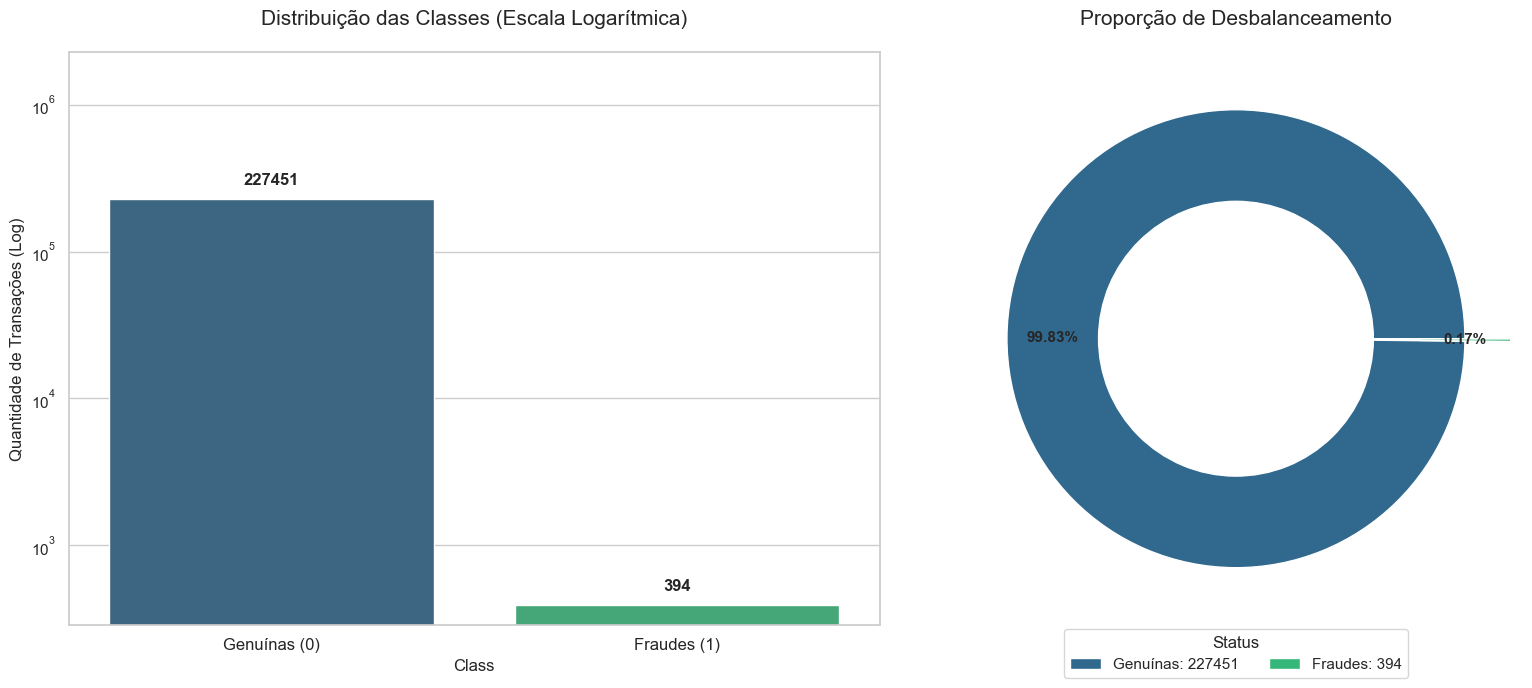

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'width_ratios': [1.2, 1]})

counts = df_train['Class'].value_counts()
splot = sns.barplot(x=counts.index, y=counts.values, ax=ax[0], hue=counts.index, palette='viridis', legend=False)

for p in splot.patches:
    splot.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=12, fontweight='bold', xytext=(0, 8),
                   textcoords='offset points')

ax[0].set_yscale('log')
ax[0].set_ylim(top=counts.max() * 10) 
ax[0].set_title('Distribuição das Classes (Escala Logarítmica)', fontsize=15, pad=20)
ax[0].set_xticklabels(['Genuínas (0)', 'Fraudes (1)'], fontsize=12)
ax[0].set_ylabel('Quantidade de Transações (Log)')

colors = sns.color_palette('viridis', 2)

wedges, texts, autotexts = ax[1].pie(
    counts, 
    autopct='%1.2f%%', 
    startangle=0, 
    colors=colors,
    pctdistance=0.80, 
    explode=(0, 0.2), 
    wedgeprops=dict(width=0.4, edgecolor='w') 
)

plt.setp(autotexts, size=11, weight="bold")

ax[1].legend(wedges, [f'Genuínas: {counts[0]}', f'Fraudes: {counts[1]}'],
          title="Status", loc="center", bbox_to_anchor=(0.5, -0.05), ncol=2)
ax[1].set_title('Proporção de Desbalanceamento', fontsize=15, pad=20)

plt.tight_layout()
plt.show()

## 3 - Análise bivariada

### 3.1 - matriz de correlação com Pearson 

**Para entender quais variáveis realmente impactam a decisão de fraude, geramos a Matriz de Correlação. O objetivo principal desta etapa é detectar o 'sinal' do 'ruído', identificando quais features possuem uma relação linear direta com a classe alvo. Ao analisar o mapa de calor, descobrimos que a fraude não é aleatória, mas deixa rastros matemáticos claros: as variáveis V17, V14 e V12 apresentam forte correlação negativa (quanto menores, maior o risco), enquanto V11 e V4 mostram correlação positiva. Isso nos indica, antes mesmo da modelagem, quais serão os principais motores de detecção do algoritmo.**

In [16]:
correlation_matrix = df_train.corr()
correlation_matrix

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,0.993379,0.110159,-0.000916,-0.405833,-0.103397,0.168587,-0.063334,0.082049,-0.034157,...,0.040144,0.134155,0.050269,-0.014512,-0.228135,-0.039213,-0.003103,-0.010477,-0.015242,-0.009976
Time,0.993379,1.000000,0.115662,-0.010436,-0.420856,-0.106422,0.173176,-0.063680,0.085216,-0.036247,...,0.044611,0.144018,0.050690,-0.016104,-0.233425,-0.042685,-0.003703,-0.010334,-0.010105,-0.010564
V1,0.110159,0.115662,1.000000,0.003139,-0.000390,0.000357,-0.003419,-0.000742,-0.001194,0.003685,...,0.001177,0.000706,0.000609,0.000441,0.001263,0.000994,0.001654,0.006157,-0.227035,-0.100041
V2,-0.000916,-0.010436,0.003139,1.000000,0.002215,-0.001218,0.000604,0.000634,0.003261,-0.002569,...,0.000239,-0.000011,0.000549,0.002428,-0.000463,0.000960,-0.000879,0.005784,-0.530143,0.090586
V3,-0.405833,-0.420856,-0.000390,0.002215,1.000000,0.000563,-0.002011,-0.001857,-0.004195,0.004347,...,0.001844,-0.001957,0.000476,0.000214,0.001974,-0.000229,-0.001733,0.007445,-0.211310,-0.194135
V4,-0.103397,-0.106422,0.000357,-0.001218,0.000563,1.000000,-0.000317,0.002109,-0.000022,-0.000620,...,-0.002265,0.001295,0.000665,0.001635,-0.001727,-0.000138,-0.001701,-0.005669,0.099970,0.135014
V5,0.168587,0.173176,-0.003419,0.000604,-0.002011,-0.000317,1.000000,-0.002342,-0.004907,0.001436,...,0.004539,-0.002530,0.001662,-0.000529,-0.000880,0.000429,-0.004623,0.007610,-0.386767,-0.093578
V6,-0.063334,-0.063680,-0.000742,0.000634,-0.001857,0.002109,-0.002342,1.000000,0.001837,0.000090,...,-0.000884,0.000389,-0.000017,-0.000781,-0.000142,0.000930,0.001961,-0.004543,0.217895,-0.043334
V7,0.082049,0.085216,-0.001194,0.003261,-0.004195,-0.000022,-0.004907,0.001837,1.000000,0.004165,...,-0.000857,0.000867,-0.000675,0.000295,-0.000007,-0.002264,0.007551,-0.006017,0.398941,-0.186184
V8,-0.034157,-0.036247,0.003685,-0.002569,0.004347,-0.000620,0.001436,0.000090,0.004165,1.000000,...,-0.000750,0.001958,-0.000148,-0.000888,-0.000168,-0.000419,-0.001561,0.002086,-0.102719,0.020552


**Visualização da matriz em heatmap**

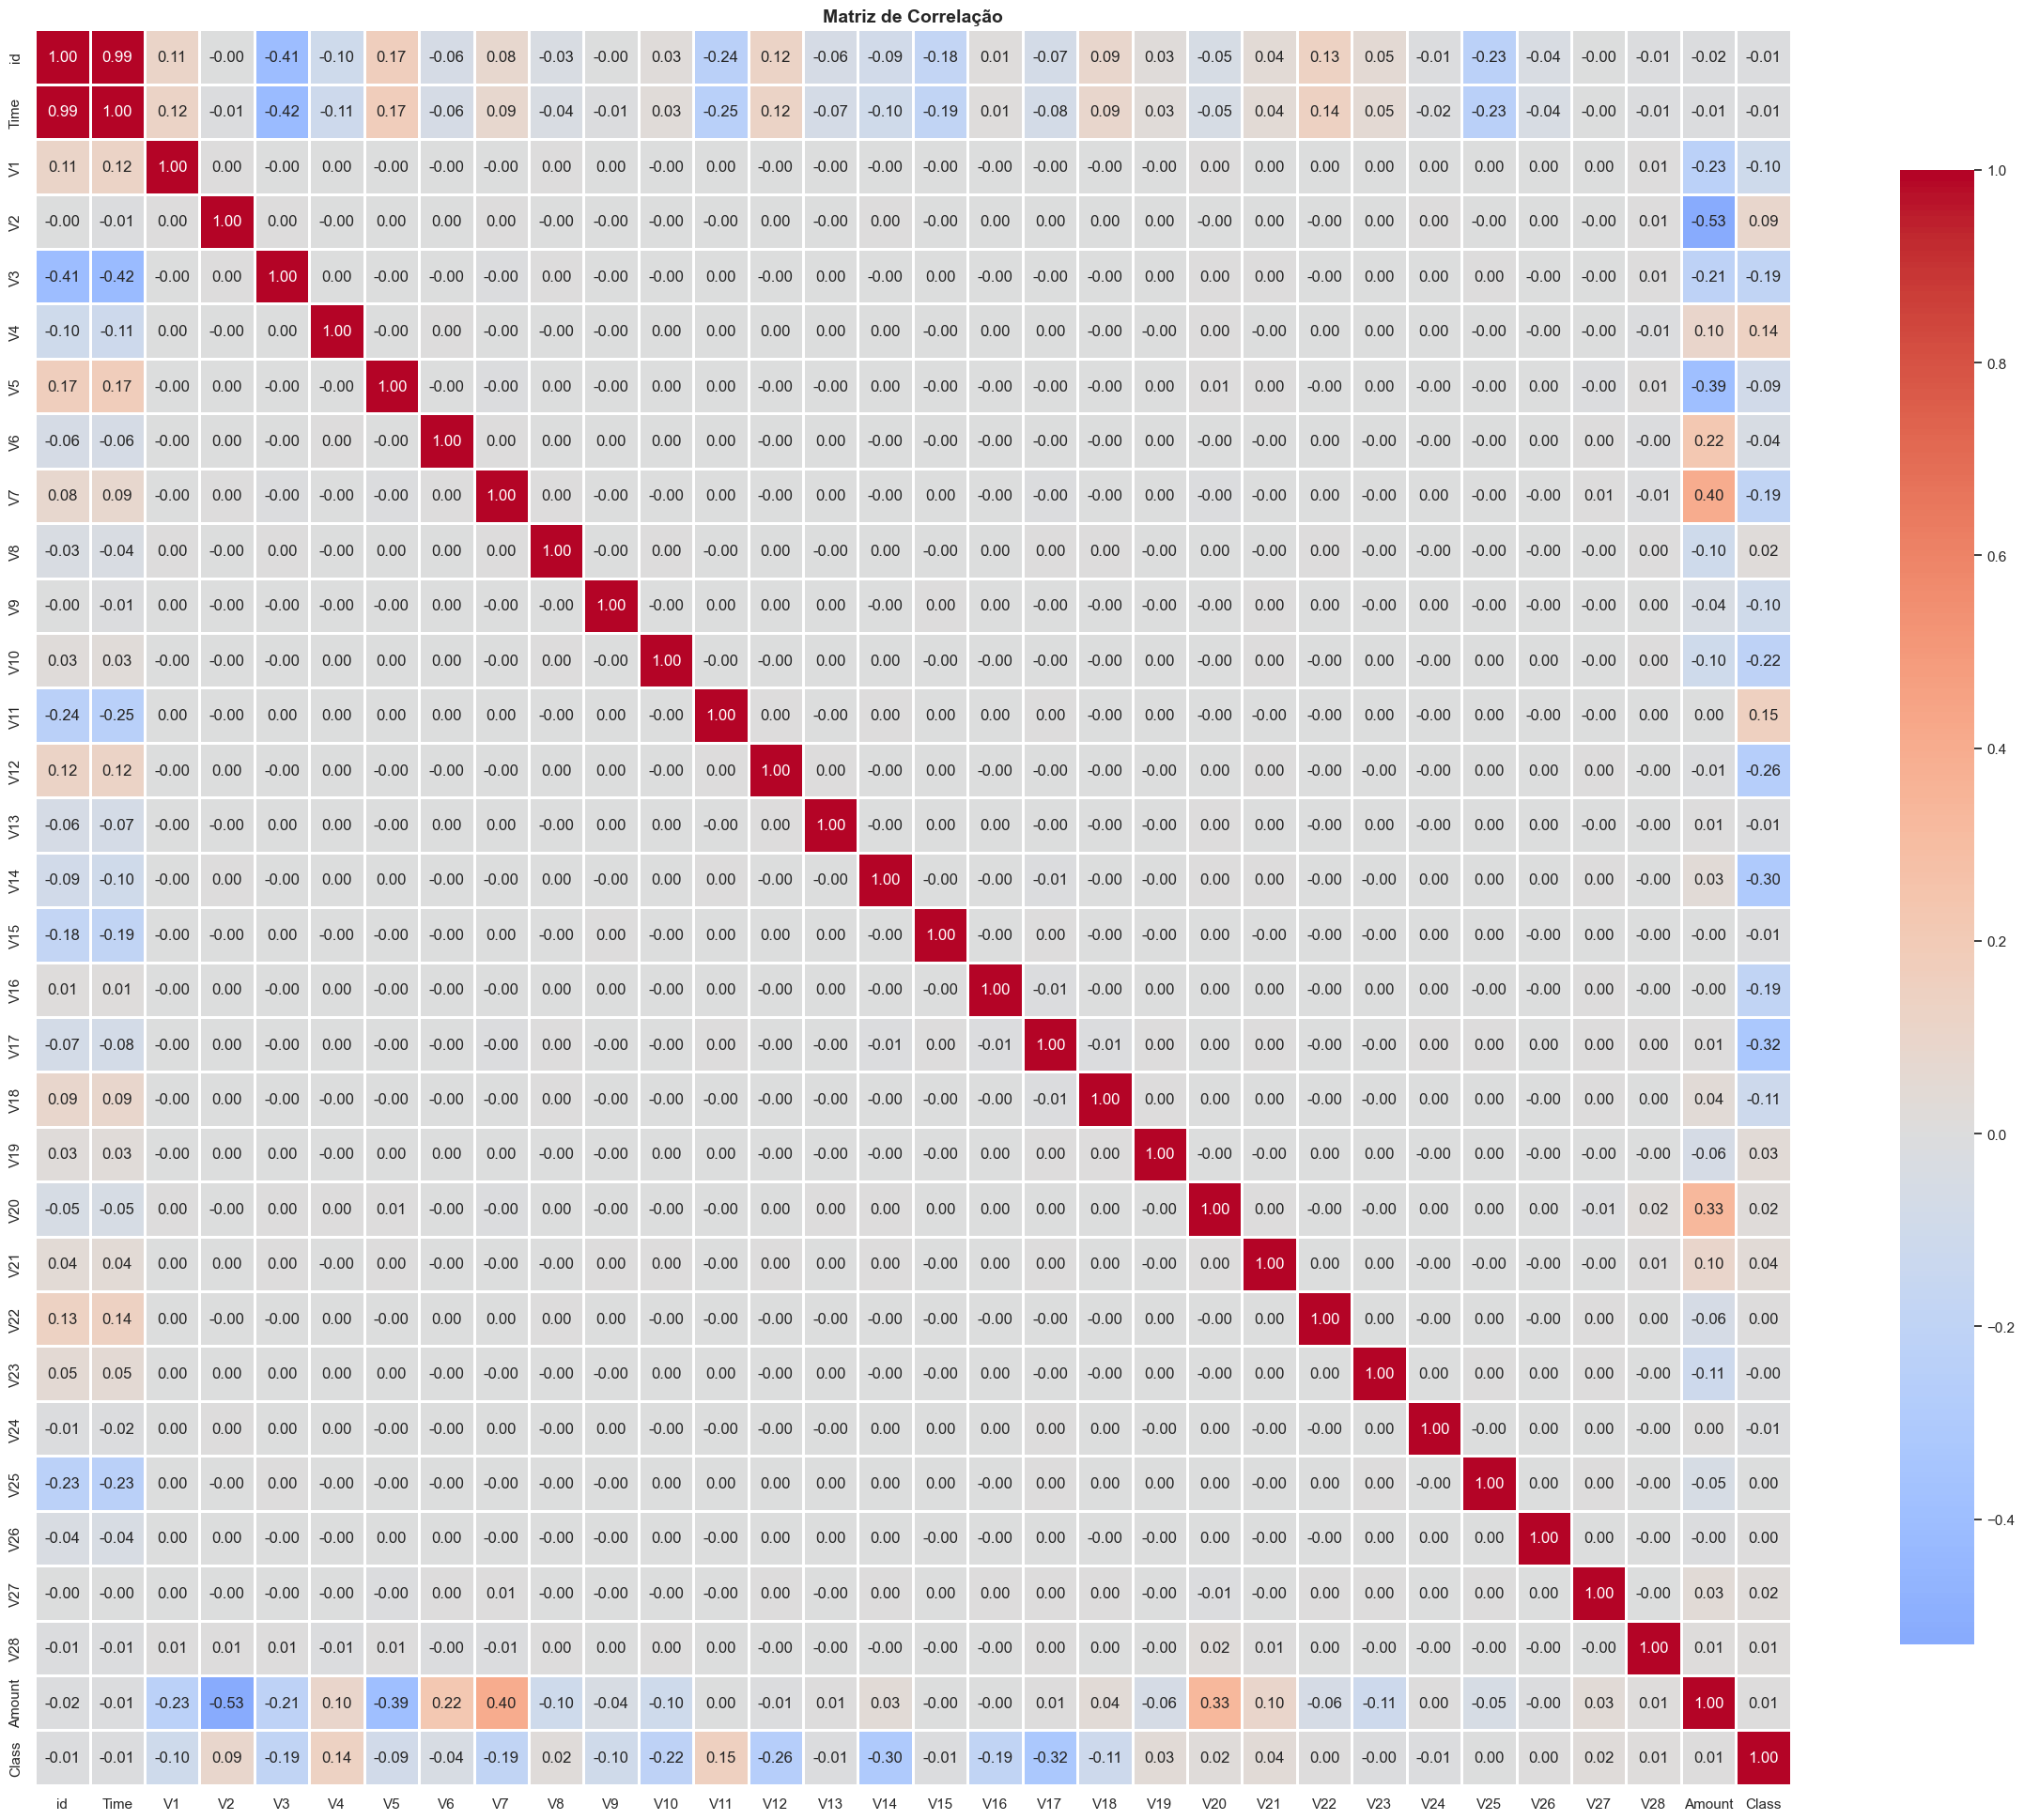

In [17]:
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**A análise de correlação de Pearson revela a hierarquia de importância das features. Destaca-se a forte correlação linear entre a variável alvo Class e as componentes V17 (0.32), V14 (0.30) e V12 (0.26). Embora coeficientes em torno de 0.30 possam parecer moderados em outros contextos, na detecção de anomalias eles representam um sinal fortíssimo de separabilidade. Além disso, observamos uma correlação espúria de quase 1.0 entre Time e id, confirmando que a coluna id é apenas um índice sequencial e deve ser removida para evitar ruído no modelo.**

In [18]:
correlations_abs = correlation_matrix.abs().unstack()
correlations_unique = correlations_abs[
    correlations_abs.index.get_level_values(0) < correlations_abs.index.get_level_values(1)
].sort_values(ascending=False)

print("Top 10 Correlações:")
print(correlations_unique.head(10).reset_index())

Top 10 Correlações:
  level_0 level_1         0
0    Time      id  0.993379
1  Amount      V2  0.530143
2    Time      V3  0.420856
3      V3      id  0.405833
4  Amount      V7  0.398941
5  Amount      V5  0.386767
6  Amount     V20  0.333663
7   Class     V17  0.321937
8   Class     V14  0.301054
9   Class     V12  0.259989


### 3.2 - interação entre as features com maior correlação

**Para aprofundar a análise, investigamos a interação bivariada entre as features de maior correlação (V17, V14, V12, V11, V4). Enquanto a análise univariada mostra cortes simples, os scatterplots revelam a geometria conjunta das classes. O gráfico evidencia que, no espaço multidimensional, as fraudes não se misturam aleatoriamente com as transações normais. Observamos também uma forte linearidade entre V17, V14 e V12 especificamente para a classe fraudulenta, sugerindo que essas componentes capturam uma estrutura sistemática do ataque, facilitando a criação de fronteiras de decisão precisas por algoritmos não-lineares.**

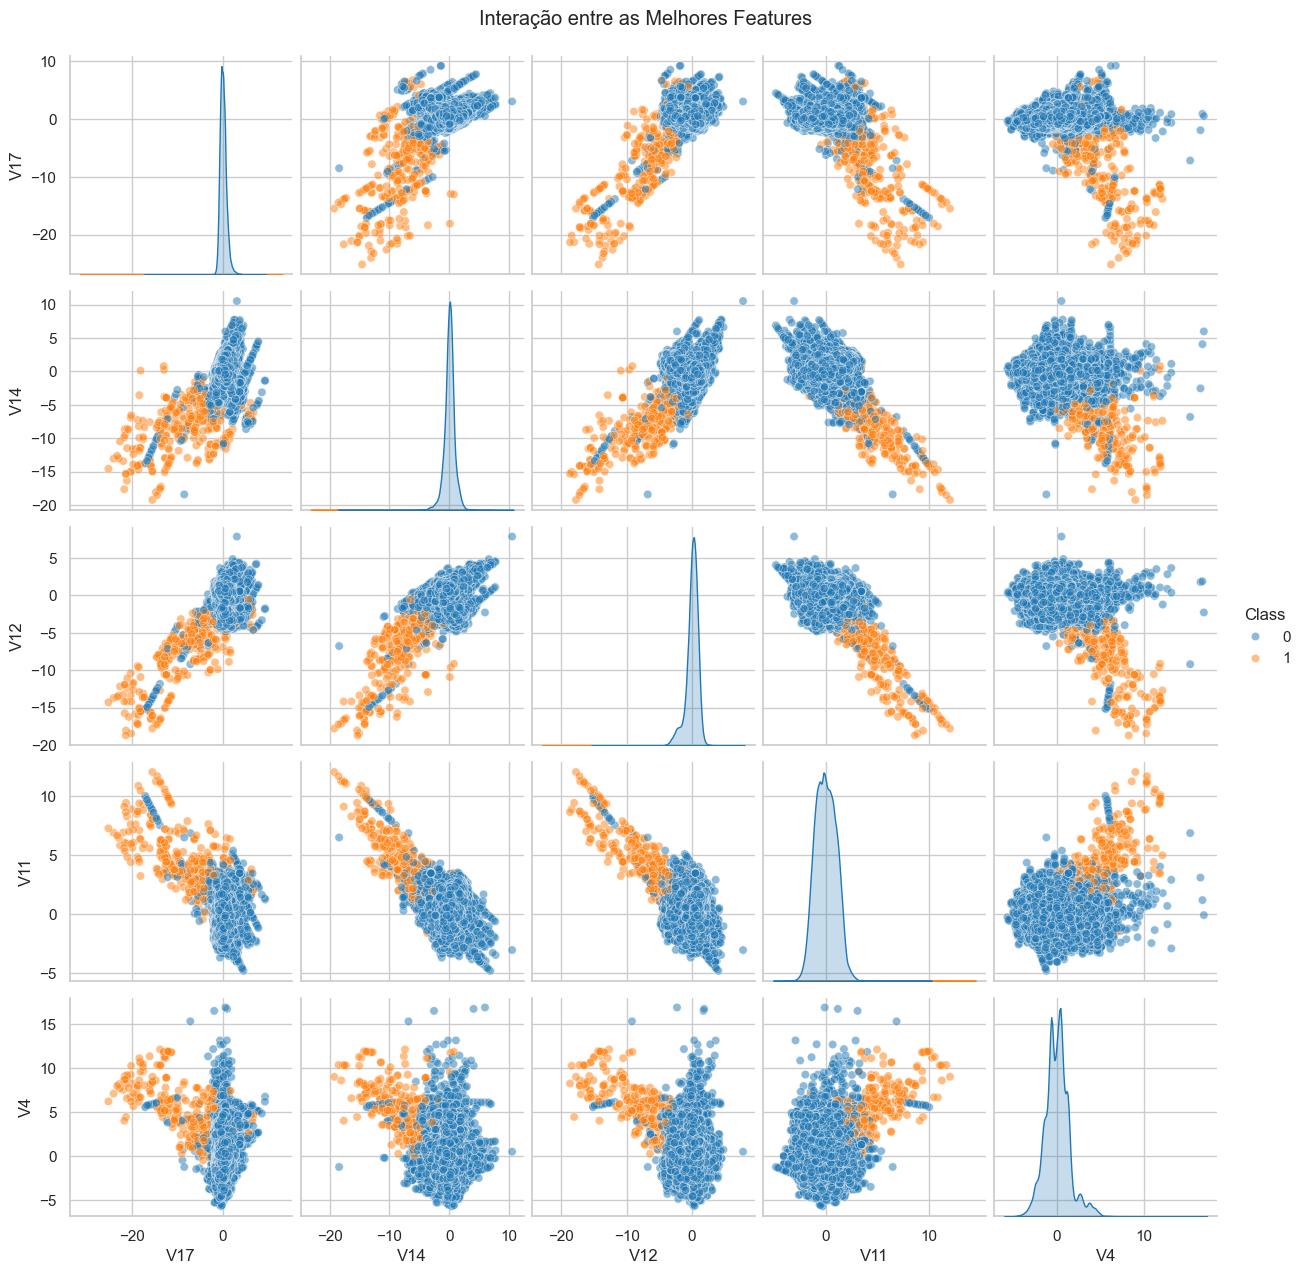

In [ ]:
# Isso vai mostrar como as fraudes se agrupam em 2D
features_interacao = ['V17', 'V14', 'V12', 'V11', 'V4']

sns.pairplot(df_train[features_interacao + ['Class']], 
             hue='Class', 
             palette=['#1f77b4', '#ff7f0e'], 
             plot_kws={'alpha': 0.5})

plt.suptitle("Interação entre as Melhores Features", y=1.02)
plt.show()

### 3.3 - Análise relacionando o horario e valores a fraudes

**Ao analisar a distribuição da variável Amount (valor da transação), observamos um padrão distinto: as transações fraudulentas tendem a se concentrar em valores baixos e médios, evitando os extremos superiores. Enquanto as transações legítimas apresentam outliers com valores muito altos, a fraude raramente atinge esses patamares. Esse comportamento indica que os fraudadores preferem passar despercebidos, realizando transações que se assemelham a compras cotidianas, em vez de arriscar grandes saques que poderiam bloquear o cartão imediatamente.**

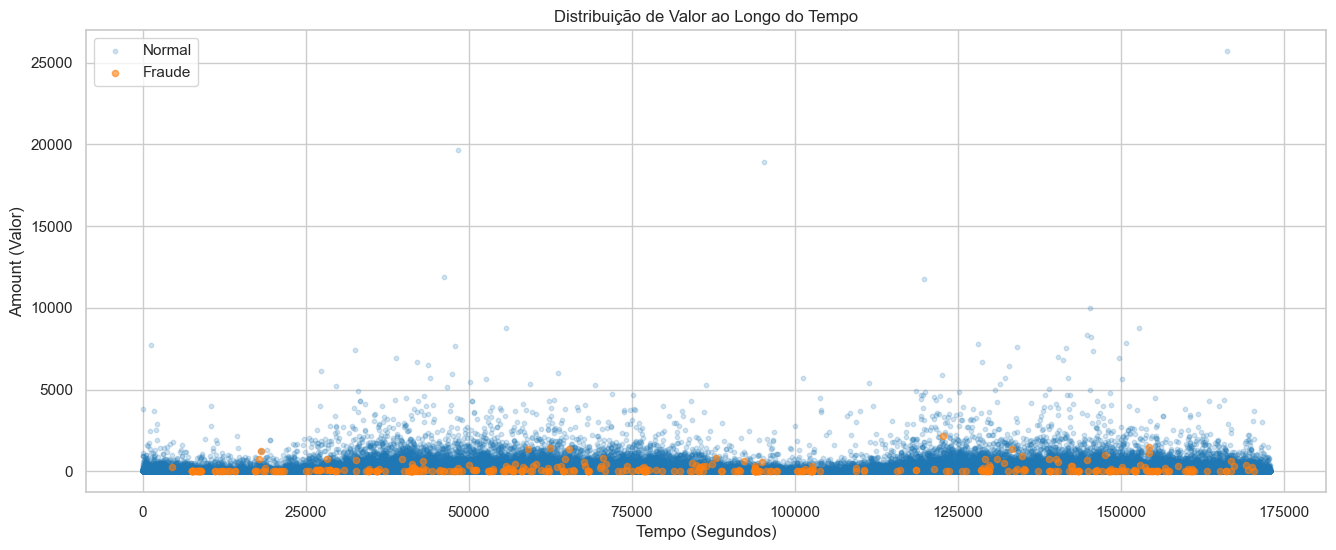

In [20]:
plt.figure(figsize=(16, 6))

# Plotar Time vs Amount apenas para fraudes
plt.scatter(df_train[df_train['Class'] == 0]['Time'], df_train[df_train['Class'] == 0]['Amount'], 
            label='Normal', alpha=0.2, s=10, color='#1f77b4')

plt.scatter(df_train[df_train['Class'] == 1]['Time'], df_train[df_train['Class'] == 1]['Amount'], 
            label='Fraude', alpha=0.6, s=20, color='#ff7f0e')

plt.title('Distribuição de Valor ao Longo do Tempo')
plt.xlabel('Tempo (Segundos)')
plt.ylabel('Amount (Valor)')
plt.legend()
plt.show()

**Antecipando uma etapa de Feature Engineering, realizamos a transformação da variável Time para Hour (hora do dia) a fim de atribuir significado semântico aos dados e facilitar a interpretação. Embora essa engenharia de recursos seja implementada definitivamente em outro notebook, utilizamos aqui uma versão preliminar para visualização. Ao analisar a distribuição temporal, observamos um padrão crucial: durante a madrugada, enquanto o volume de transações legítimas cai drasticamente, ocorre um aumento proporcional nas fraudes. Já durante o dia, embora a fraude persista, ela é 'camuflada' pelo alto volume de transações normais, dificultando sua identificação visual.**

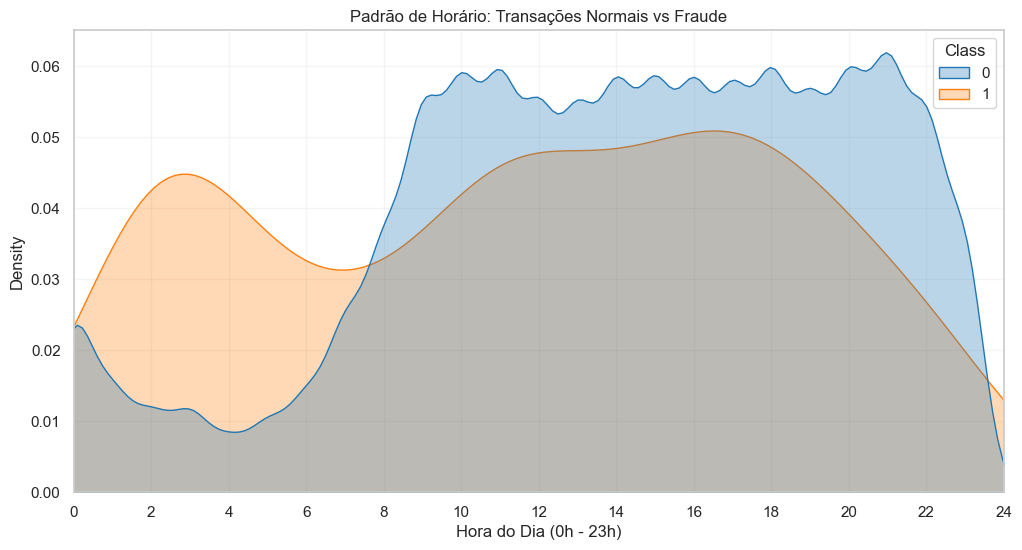

In [ ]:
df_test = df_train.copy()  
# Converter Segundos em Hora do Dia
df_test['Hour'] = df_test['Time'].apply(lambda x: np.floor(x / 3600) % 24)

# Visualizar a Densidade (KDE)
plt.figure(figsize=(12, 6))

sns.kdeplot(data=df_test, x='Hour', hue='Class', 
            common_norm=False, fill=True, palette=['#1f77b4', '#ff7f0e'], alpha=0.3)

plt.title('Padrão de Horário: Transações Normais vs Fraude')
plt.xlabel('Hora do Dia (0h - 23h)')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 2))
plt.grid(True, alpha=0.2)

plt.show()

### 3.4 - t-SNE para vizualisar a separação das classes

**Para visualizar a estrutura dos dados em um espaço bidimensional, aplicamos o algoritmo t-SNE (t-Distributed Stochastic Neighbor Embedding), uma técnica não-linear de redução de dimensionalidade. O resultado é extremamente promissor: as transações fraudulentas (pontos laranja) não estão dispersas aleatoriamente entre as normais, mas sim agrupadas em clusters ou 'ilhas' bem definidas. Essa separação visual confirma que as variáveis do dataset contêm padrões latentes fortes, indicando que modelos de classificação não-lineares (como Random Forest ou XGBoost) terão alta eficácia em traçar as fronteiras de decisão entre as classes.**

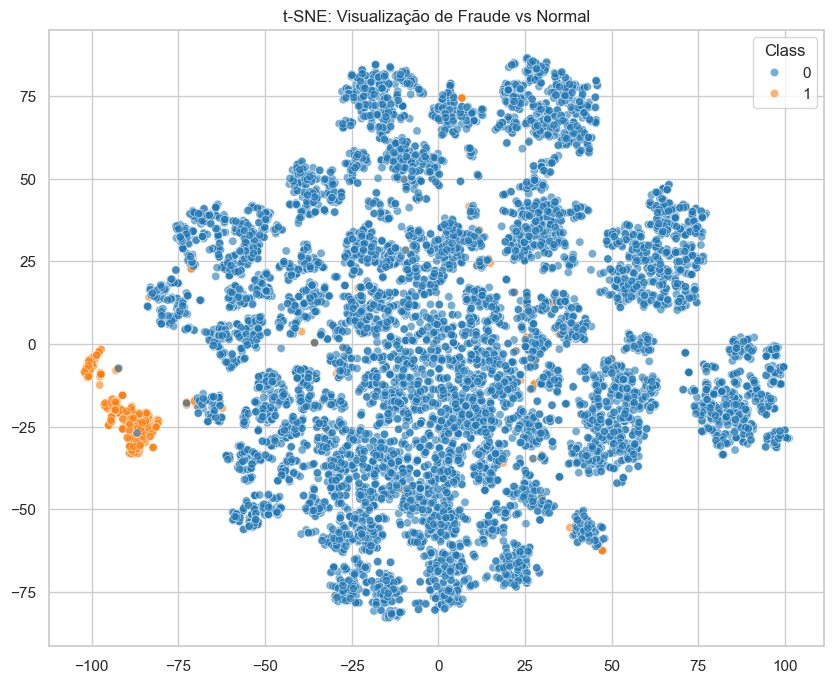

In [ ]:
# todas as fraudes + 10000 normais aleatórios
df_sample = pd.concat([
    df_train[df_train['Class'] == 1],
    df_train[df_train['Class'] == 0].sample(10000, random_state=42)
])

X_sample = df_sample.drop(['Class', 'id', 'Time'], axis=1)
y_sample = df_sample['Class']


X_scaled = StandardScaler().fit_transform(X_sample)

# Aplicamos t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Plotamos
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=y_sample, palette=['#1f77b4', '#ff7f0e'], alpha=0.6
)
plt.title('t-SNE: Visualização de Fraude vs Normal')
plt.show()